<a href="https://colab.research.google.com/github/ccfernandes600/Sistema_Reconhecimento_Facial_do_Zero/blob/main/Reconhecimentod_de_face_ocm_transfer_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PROJETO RECONHECIMENTO DE FACE COM TRANSFER LEARNING - - KERAS

Este projeto conciste em ensinar através de redes neurais pré-treinadas a reconhecer pessoas (face) através de treinamento, ou seja,  vamos criar de dois a mais díretórios com nome das pessoas que queremos reconhecer com centenas de fotos de cada.  Passsamos estas fotos para treinar com seu respectivo label (rotulo ou nome).  Depois da rede treinaida vamos usar fotos das pessoas em questão que não foram usadas na etapa de treinamento para verificar se rede consegue identificar pelo nome de quem é a foto.  

# Instalando e importando as Bibliotecas que necessárias ao Projeto
. Pandas
. Numpy
. Matplotlib
. TensorFlow
. Keras
. OS
. randon
. etc.


In [ ]:
#importação das bibliotecas
try:
  import time
  from google.colab import drive
  from google.colab import files
  from IPython.display import clear_output  # Para limpar a saída anterior
  import pandas as pd
  import numpy as np
  import matplotlib.pyplot as plt
  import warnings
  warnings.filterwarnings('ignore')
  #from keras.preprocessing.image import load_img
  from tensorflow.keras.utils import load_img, to_categorical
  from sklearn.preprocessing import LabelEncoder
  from sklearn.model_selection import train_test_split
  from sklearn.model_selection import KFold
  from tensorflow.keras.preprocessing.image import img_to_array, ImageDataGenerator
  from tensorflow.keras.models import Sequential
  from tensorflow.keras.layers import BatchNormalization,   Dense
  from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten
  from tensorflow.keras.layers import Input, Dropout, GlobalAveragePooling2D
  from tensorflow.keras.applications import VGG16, ResNet50, InceptionV3, VGG19
  from tensorflow.keras.applications import MobileNetV2, DenseNet121
  from tensorflow.keras.optimizers import Adam
  from tensorflow.keras.models import Model
  import cv2
  import os
  import tqdm
  import random
  import PIL
  print("Bibliotecas importadas com sucesso")
except:
  print(f'Erro ao importar Bibliotecas: {e}')





Bibliotecas importadas com sucesso


# Carregando e Pré-processando os Dados

Para um sistema de reconhecimento facial eficaz, precisamos de um conjunto de dados de faces. Este conjunto de dados podem ser carregados para o colab de diversas formas.  Pode ser importado diretamente do Google Driver, do Github.  Pode ser feito o upload de arquivos compactados e podem ser lidps diretamente da sua maquina. Aqui vamos usar preferencialmente a importação do Google Driver, porém vamos deixar de exemplos outras de formas de importdar dados para o colab.

## Importando dados direto do Google Driver

Os seus dados devem estarem em um Google Driver acessível para que você possa fazer um processo de montagem de pasta virtual no colab comforme exemplo abaixo. Usei o try para certificar de que  a montagem da pasta virtual ocorreu com sucesso ou será notificada o eventual erro.
```python
from google.colab import drive
drive.mount('/content/drive')
# pode ser qualquer nome onde tem drive
#depois de montado a arvore de diretório será
# /content/drive/MyDrive
# MyDriver é o conteudo do Google Drive
```


In [ ]:
#Montar pastas no google drive
try:
  drive.mount('/content/drive')
  print(f'Pastas montadas com sucesso!')
except Exception as e:
  print(f'Erro ao montar pastas: {e}')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Pastas montadas com sucesso!


In [ ]:
# Vericando meus dados no Google Drive
!df -h /content/


Filesystem      Size  Used Avail Use% Mounted on
overlay         108G   28G   81G  26% /


In [ ]:
!ls -l drive/MyDrive/conjunto_de_dados/

total 16
drwx------ 2 root root 4096 Jun 19 14:40 Claudio
drwx------ 2 root root 4096 Jun 19 14:43 Maria
drwx------ 2 root root 4096 Jun 19 14:55 Pedro
drwx------ 2 root root 4096 Jun 19 14:40 Rafaela


# Importar dados direto da maquina local

Os seus dados devem estar em um diretório na sua  acessível  na sua máquina local para que você possa fazer um processo de  upload montagem de pasta virtual no colab comforme exemplo abaixo. Usei o try para certificar de que a montagem da pasta virtual ocorreu com sucesso ou será notificada o eventual erro.
Usando biblioteca do colab para importar da maquina

1.   Usando biblioteca do colab para importar da maquina
  ```python
from google.colab import files
uploaded_file = files.upload()
```
2.   Usando wget ou qualquer outra ferramenta do tipo


```bash
!wget -O nome_do_arquivo.ext "url_dos_seus_dados"
```





---



# Tratando arquivos compactados no Colab:

Para lidar com arquivos compactados no Colab, você pode usar as bibliotecas padrão do Python como zipfile, tarfile ou gzip. Aqui estão alguns exemplos:


```python
import zipfile

with zipfile.ZipFile('seu_arquivo.zip', 'r') as zip_ref:
zip_ref.extractall('destino')
```

substitua ***seu_arquivo.zip*** pelo nome do seu arquivo zip e ***destino*** pela pasta onde você deseja extrair os arquivos.


**Descompactando um arquivo .tar.gz:**
```python
import tarfile

with tarfile.open('seu_arquivo.tar.gz', 'r:gz') as tar_ref:
tar_ref.extractall('destino')
```
Substitua ***seu_arquivo.gz*** pelo nome do seu arquivo gz e ***seu_arquivo_descompactado*** pelo nome desejado para o arquivo descompactado

**Usando o unzip, untar e demais comando de descompactação comumente usados em terminais Linux**

Execute o comando unzip no notebook:

```bash
!unzip nome_do_arquivo.zip
```
Substitua ***nome_do_arquivo.zip*** pelo nome do seu arquivo .zip.

Isso irá extrair o conteúdo do arquivo .zip para o diretório atual no Colab.

Se você quiser extrair o conteúdo para um diretório específico, use a opção -d:


# Tratar as imagens no diretórios para gerar seus respectivos labels

Nesta etapa vamos gerar um conjunto de dados formado por imagem + sua label (nome ou rótulo). Por exemplo, tenho um diretório chamado Claudio com 300 imagens de claudio que serão treinas para o reconhecimento da face de Claudio.  Este dados irão fomar duas listas imagens = [] e labels = []   e podem facilmente serem tranformadas em dataframe do Canvas.
```python
df = pd.DataFrame()
df["imagens"] = input_path
df["labels"] = label
```



In [ ]:
#Função para carregar as imagens e seus labels de varios diretórios
def carregar_dados(diretorio, tamanho_imagem=(64, 64)):
  """ Funcao para carregar os dados e seus labels """
  imagens = []
  labels = []
  for label in os.listdir(diretorio):
      path = os.path.join(diretorio, label)
      if os.path.isdir(path):
          for img in os.listdir(path):
              img_path = os.path.join(path, img)
              imagem = cv2.imread(img_path)
              if imagem is not None:
                  imagem = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)
                  imagem = cv2.resize(imagem, tamanho_imagem)
                  imagem = img_to_array(imagem)
                  imagens.append(imagem)
                  labels.append(label)
  imagens = np.array(imagens, dtype="float") / 255.0 # Array de  iamgens
  labels = np.array(labels) # Array de labels
  return imagens, labels #retorna as imagens e os labals



# Carregar o conjunto de dados
 Aqu estou lendo as imagens diretamente do Google Driver, contudo conforme citei anteriomente pode ser usados várias outras estratégias upload das imagens.

In [ ]:
# Chamandoo a funçao carrer_diretorio()
# Carregar o conjunto de dados armazenados no meu Google Drive
try:
  diretorio_dados = '/content/drive/MyDrive/conjunto_de_dados/'
  imagens, labels = carregar_dados(diretorio_dados) # Chamada da função que trata os diretórios
  print(f'Dados carregados com sucesso!')
  print(f'Imagens: {imagens.shape}') #imprime o shape da array de imagens
  print(f'Labels: {labels.shape}') # imprime o shape da array de labels
except Exception as e:
  print(f'Erro ao carregar os dados: {e}')


Dados carregados com sucesso!
Imagens: (1451, 64, 64, 3)
Labels: (1451,)


# Visualizar algumas imagens de cada label

Vamos plotar 05 imagens de cada label para certificar que o processo de carga foi realizado com sucesso

In [ ]:
# Função que plota 10 imagens de cada label (nova Versão)
def plot_images_by_label(images, labels, num_images=5):
    """Plota um número especificado de imagens por label em um grid 5x5."""

    unique_labels = np.unique(labels)
    plt.figure(figsize=(25, 25))  # Ajusta o tamanho da figura

    for i, label in enumerate(unique_labels):
        label_indices = np.where(labels == label)[0][:num_images]
        label_images = images[label_indices]

        for j, img in enumerate(label_images):
            plt.subplot(5, 5, i * num_images + j + 1)  # Cria subplots 5x5
            plt.imshow(img)
            plt.title(label)  # Coloca o label na parte superior
            plt.axis('off')  # Remove os eixos

    plt.tight_layout()  # Ajusta o espaçamento entre os subplots
    plt.show()



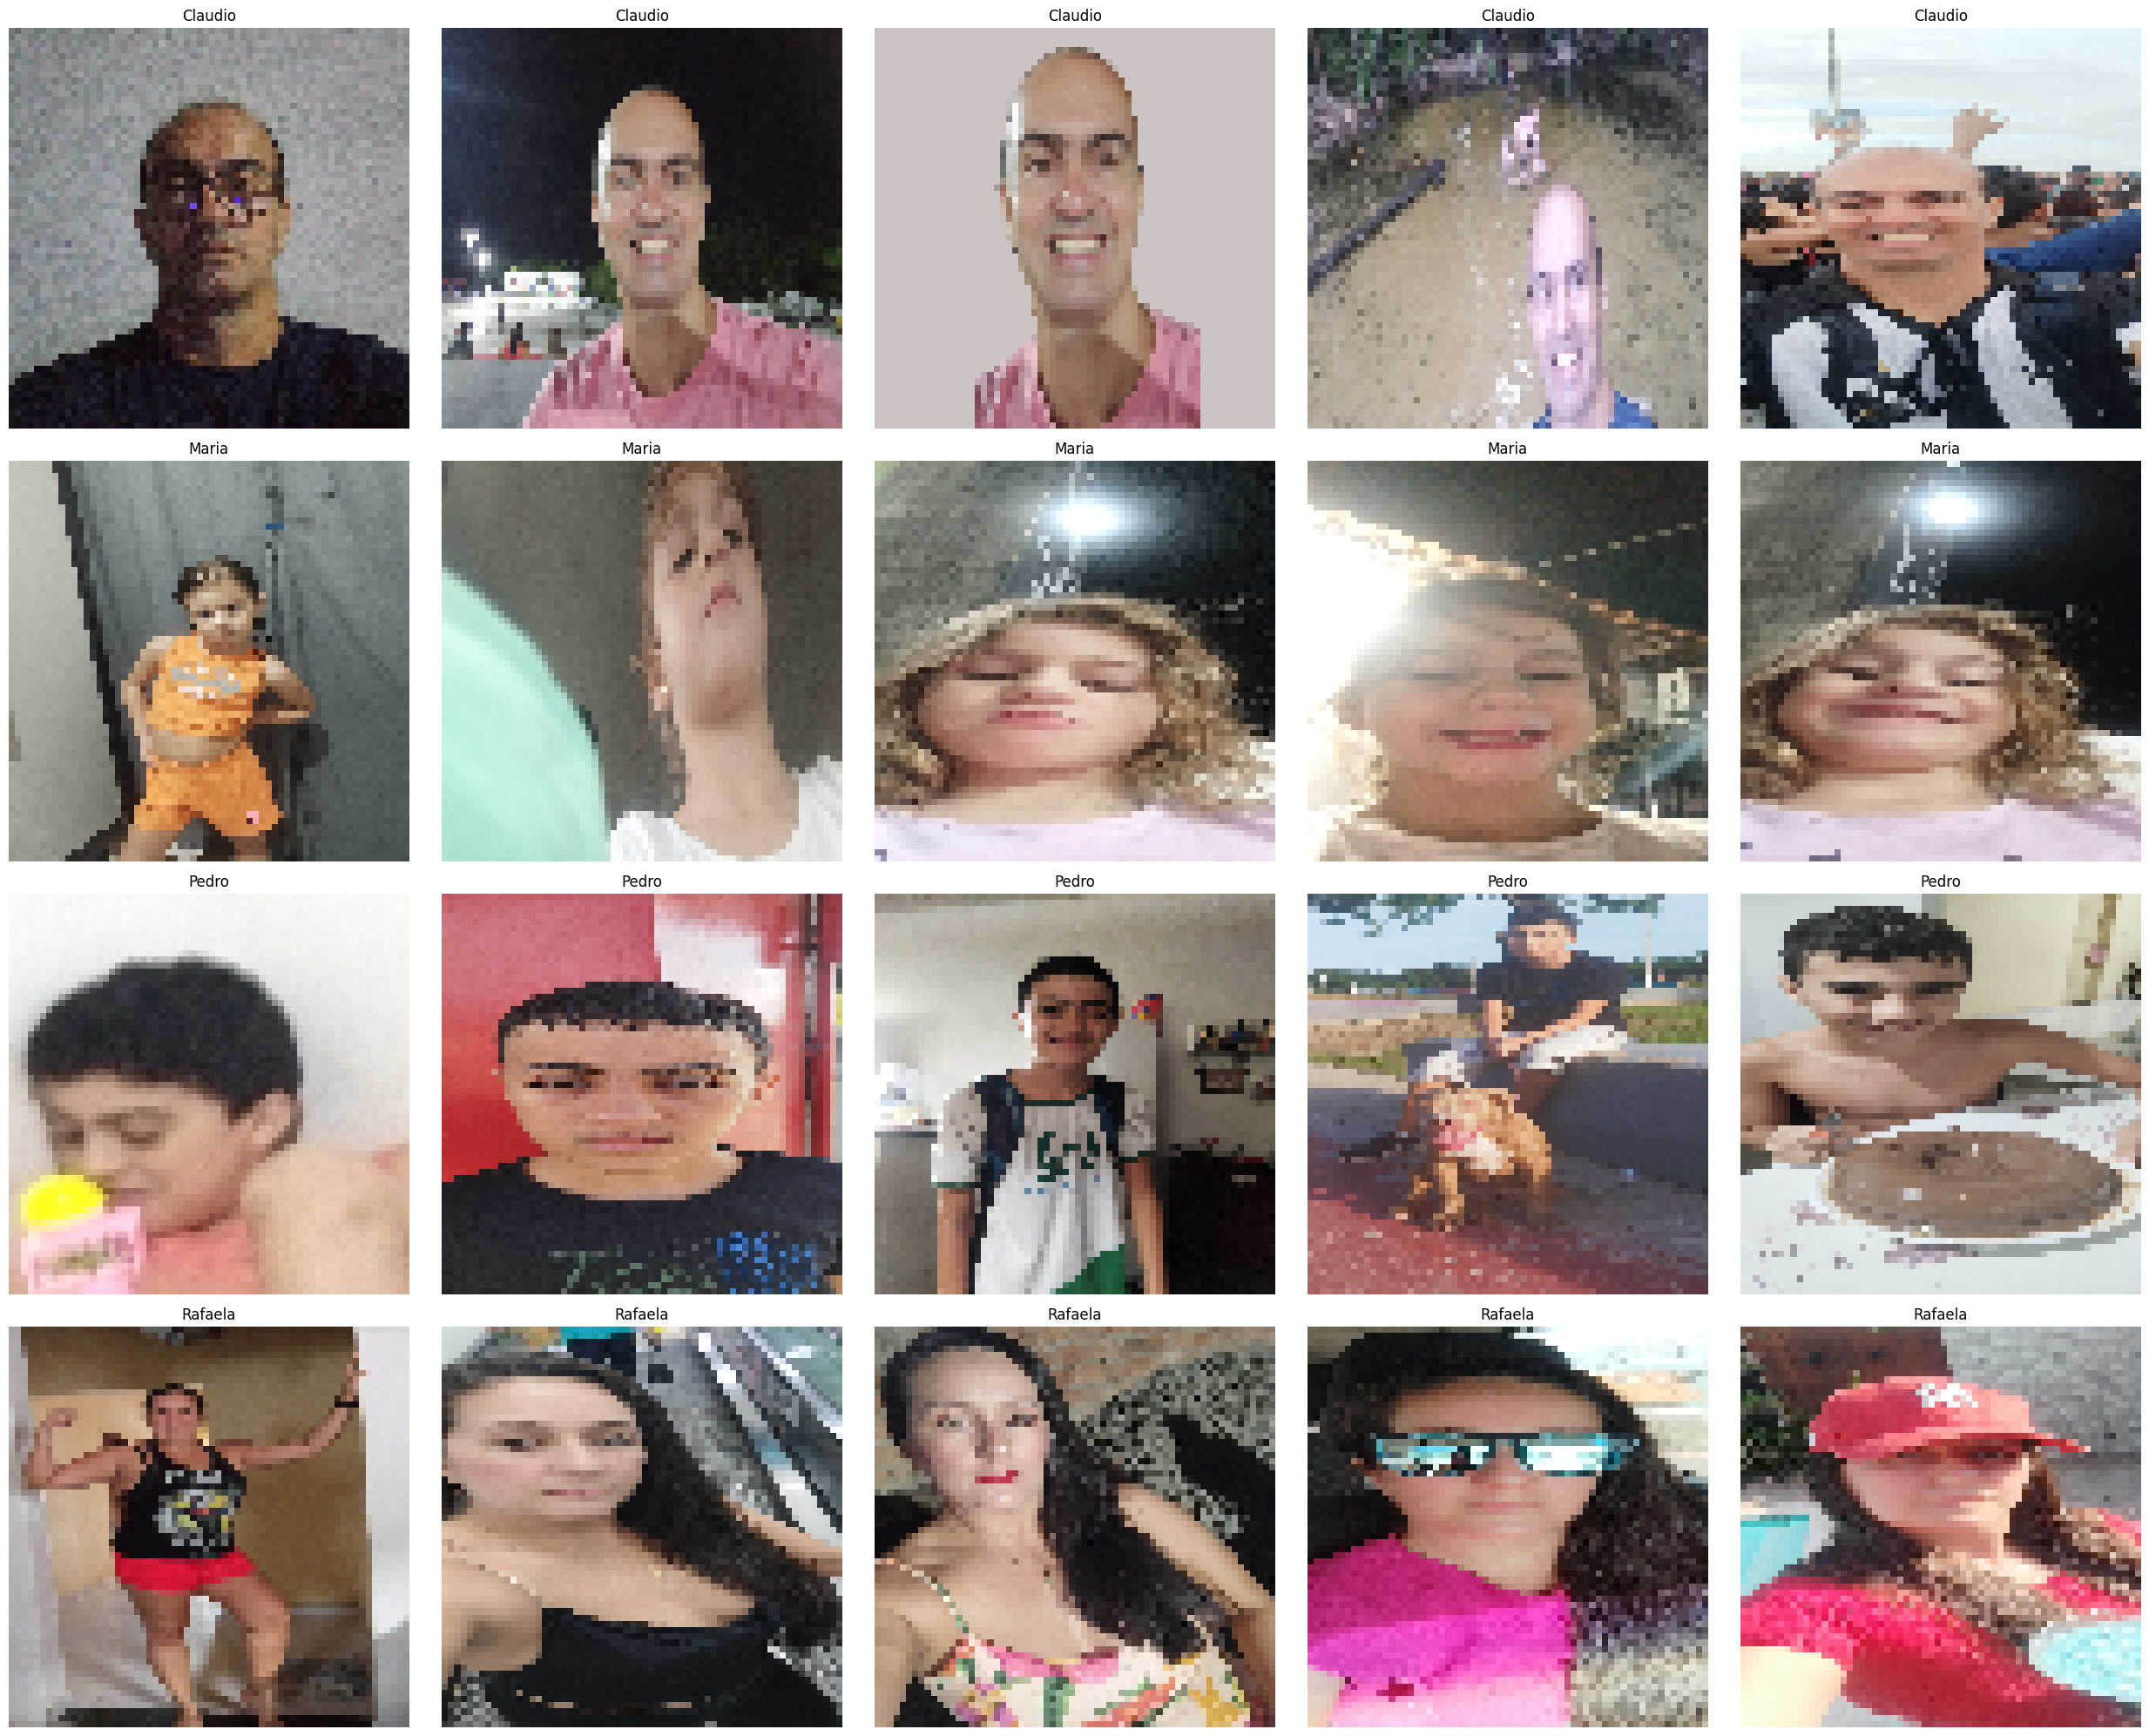

In [ ]:
# Chamando a função
plot_images_by_label(imagens, labels)

# Verificando a distribuição das classes e balanceamento


In [ ]:
# Convertendo os arrays iamgens e labels para dataframe

df = pd.DataFrame()
#df["imagens"] = imagens
df["labels"] = labels

In [ ]:
df.head()

,imagens,labels


A função countplot conta quantas vezes cada valor único aparece na coluna "label".
 Em seguida, ela desenha um gráfico de barras, onde:
O eixo x representa os valores únicos da coluna "labels".
O eixo y representa a contagem de cada valor.

<Axes: xlabel='count', ylabel='labels'>

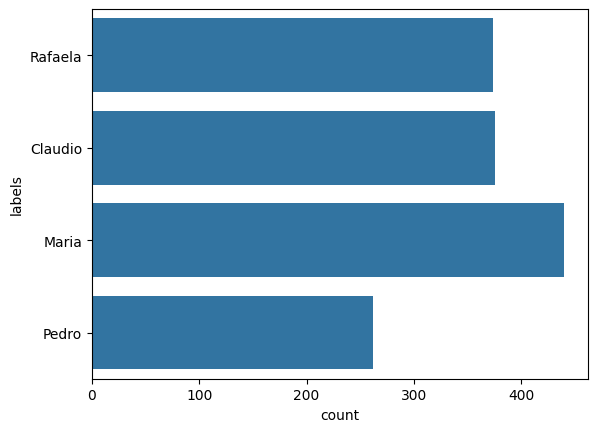

In [ ]:
# Verificando a distribuição das classes e balanceamento.
import seaborn as sns
sns.countplot(df["labels"])

# Verifica e converte imagens em subdiretórios para o formato JPG
Verificando se todas as imagens de cada label são do tipo <.jpg> se outro formato será mudado  para <.jpg>


In [ ]:
def converter_imagens_para_jpg(diretorio_dados):
  """Verifica e converte imagens em subdiretórios para o formato JPG."""

  for diretorio in os.listdir(diretorio_dados):
      caminho_diretorio = os.path.join(diretorio_dados, diretorio)

      if os.path.isdir(caminho_diretorio):
          for arquivo in os.listdir(caminho_diretorio):
              nome_arquivo, extensao = os.path.splitext(arquivo)
              caminho_arquivo = os.path.join(caminho_diretorio, arquivo)

              if extensao.lower() != '.jpg':  # Verifica se não é JPG (ignorando maiúsculas/minúsculas)
                  try:
                      img = Image.open(caminho_arquivo)
                      img.save(os.path.join(caminho_diretorio, nome_arquivo + '.jpg'))
                      os.remove(caminho_arquivo)  # Remove o arquivo original
                      print(f"Convertido '{arquivo}' para '{nome_arquivo}.jpg'")
                  except Exception as e:
                      print(f"Erro ao converter '{arquivo}': {e}")

In [ ]:
#Chamando a função converter_imagens_para_jpg(diretorio_dados)
converter_imagens_para_jpg(diretorio_dados)

Erro ao converter 'e511e2dcf1230702fe549829b741e6f7.mp4': name 'Image' is not defined
Erro ao converter 'IMG-20170603-WA0020.jpeg': name 'Image' is not defined
Erro ao converter 'IMG-20170602-WA0040.jpeg': name 'Image' is not defined
Erro ao converter 'IMG-20170602-WA0014.jpeg': name 'Image' is not defined
Erro ao converter 'IMG-20170602-WA0022.jpeg': name 'Image' is not defined
Erro ao converter 'IMG-20170521-WA0009.jpeg': name 'Image' is not defined
Erro ao converter 'IMG-20170602-WA0050.jpeg': name 'Image' is not defined
Erro ao converter 'IMG-20170604-WA0017.jpeg': name 'Image' is not defined
Erro ao converter 'IMG-20170604-WA0015.jpeg': name 'Image' is not defined
Erro ao converter 'IMG-20170526-WA0047.jpeg': name 'Image' is not defined
Erro ao converter 'IMG-20170602-WA0000.jpeg': name 'Image' is not defined
Erro ao converter 'IMG-20170602-WA0024.jpeg': name 'Image' is not defined
Erro ao converter 'IMG-20170602-WA0008.jpeg': name 'Image' is not defined
Erro ao converter 'IMG-201

 # Tratando os labels

 Este segmento de código abaixo tem como objetivo principal preparar os rótulos (labels) para serem utilizados em um modelo de aprendizado de máquina, especialmente em tarefas de classificação.

**Por que dividir os dados em treinamento e teste?**

**Treinamento**: O conjunto de treinamento é usado para ajustar os parâmetros do seu modelo de aprendizado de máquina, permitindo que ele aprenda padrões nos dados.

**Teste**: O conjunto de teste é usado para avaliar o desempenho do modelo em dados que ele nunca viu antes. Isso ajuda a verificar se o modelo está generalizando bem (ou seja, se ele é capaz de fazer previsões precisas em novos dados) e a evitar o overfitting (quando o modelo se ajusta muito bem aos dados de treinamento, mas não generaliza para novos dados).

In [ ]:
# Codificar os rótulos
try:
  le = LabelEncoder()
  labels = le.fit_transform(labels)
  num_classes = len(np.unique(labels))
  labels = to_categorical(labels, num_classes)
  print(f'Labels codificados com sucesso!')
  print(f'Número de classes: {num_classes}')
except Exception as e:
  print(f'Erro ao codificar os rótulos: {e}')

Labels codificados com sucesso!
Número de classes: 4


In [ ]:
# Separar 80% das imagens para o treinamento da RNN e reservar 20% para usar na
# testagem da rede

#Dividir os dados em treinamento e teste
try:
  x_train, x_test, y_train, y_test = train_test_split(imagens, labels, test_size=0.2, random_state=42)
  print(f'Dados divididos em treinamento e teste com sucesso!')
except Exception as e:
  print(f'Erro ao dividir os dados: {e}')

  ## Para usar biblioteca sklearn é preciso importar a mesma e acordo com
  ## a linha abaixo:
  # from sklearn.model_selection import train_test_split
  ## outra sintaxe para separ dados de treino e  teste
  # train, test = train_test_split(df, test_size=0.2, random_state=42)



Dados divididos em treinamento e teste com sucesso!


# Argumentação dos Dados

Este código utiliza a classe ***ImageDataGenerator*** do Keras para realizar aumento de dados (data augmentation) e preparar seus dados de imagem para o treinamento e validação de um modelo de aprendizado profundo.

In [ ]:
# Data Augmentation
try:
  # Data augmentation
  train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

  val_datagen = ImageDataGenerator(rescale=1./255)

  train_generator = train_datagen.flow(x_train, y_train,batch_size=32)

  val_generator = val_datagen.flow(x_test, y_test,batch_size=32)
# Nornalização dos dados
  x_train = x_train.astype('float32') / 255.0
  x_test = x_test.astype('float32') / 255.0
  print(f'Data augmentation configurado com sucesso!')
except Exception as e:
  print(f'Erro ao configurar data augmentation: {e}')

Data augmentation configurado com sucesso!


# Criação do Modelo
Aqui fiz uma abordagem que me dar a chance de escolher 05 redes de pré-treino direfentes.

É possível carregar modelos pré-treinados (ResNet50, InceptionV3,MobileNetV2,DenseNet121 e VGG16) e congelar suas camadas base para **transfer learning.**

In [ ]:
# Função que Carrega um modelo pré-treinado com base na escolha do usuário.
def load_base_model(model_choice, input_shape=(224, 224, 3)):  # Tamanho de entrada padrão para muitos modelos pré-treinados
    """Carrega um modelo pré-treinado com base na escolha do usuário."""
    models = {
        1: VGG19,
        2: InceptionV3,
        3: MobileNetV2,
        4: DenseNet121,
        5: VGG16
    }
    if model_choice not in models:
        raise ValueError(f"Escolha de modelo inválida: {model_choice}")  # Tratamento de erro

    try:
        base_model = models[model_choice](weights='imagenet', include_top=False, input_shape=input_shape)
        base_model.trainable = False  # Freeze base layers
        return base_model
    except Exception as e:
        print(f"Erro ao carregar o modelo: {e}")
        return None

# Função que Adiciona uma camada de classificação ao modelo base.


In [ ]:
# Adiciona uma camada de classificação ao modelo base, assumindo que
# num_classes já esteja definido
def add_classifier_head(base_model, num_classes, activation='softmax'):
    """Adiciona uma camada de classificação ao modelo base."""
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    predictions = Dense(num_classes, activation=activation)(x)
    model = Model(inputs=base_model.input, outputs=predictions)
    return model

In [ ]:
# Chamada das Funções load_base_model() e dd_classifier_head
print("""Choose a pre-trained model:
print 1. VGG19
print 2. InceptionV3
print 3. MobileNetV2
print 4. DenseNet121
print 5. VGG16""")

choice = int(input("Entre com sua opçãp (1-5): "))
while choice not in [1, 2, 3, 4, 5]:
    print("Opção inválida. Por favor entre com um número entre 1 e 5.")
    choice = int(input("Entre com sua opção (1-5): "))
print(f"Você escolheu o modelo {choice}")
# Carregue e prepare o modelo escolhido (Substitua 'num_classes' pelo valor correto)
try:
  # Carregar o modelo
  model = load_base_model(choice)
  base_model = model
  print(f'Modelo carregado com sucesso!')
except Exception as e:
  print(f'Erro ao carregar o modelo: {e}')


Choose a pre-trained model:
print 1. VGG19
print 2. InceptionV3
print 3. MobileNetV2
print 4. DenseNet121
print 5. VGG16
Entre com sua opçãp (1-5): 5
Você escolheu o modelo 5
58889256/58889256 [==============================] - 0s 0us/step
Modelo carregado com sucesso!


In [ ]:
# Chamando a função que adiciona a camada de classificação
try:
  # Escolha um otimizador e uma função de perda apropriados)
  model = add_classifier_head(base_model, num_classes)
  print(f'Modelo compilado com sucesso!')
  model.summary()
except Exception as e:
  print(f'Erro ao compilar o modelo: {e}')


Modelo compilado com sucesso!
Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  

In [ ]:
# Compilar o modelo
try:
  model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy',metrics=['accuracy'])
  print(f'Modelo compilado com sucesso!')
  model.summary()
except Exception as e:
  print(f'Erro ao compilar o modelo: {e}')


Modelo compilado com sucesso!
Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  

# Treinamento da Rede

Esse código realiza o seguinte:

Aplica transformações aleatórias (aumento de dados) às imagens de treinamento.
Gera lotes de dados de treinamento e os passa para o modelo.
A cada época, avalia o modelo nos dados de validação.
Repete o processo por 20 épocas.
Armazena o histórico de treinamento na variável history.
Após o treinamento:

Você pode usar a variável history para analisar o desempenho do modelo ao longo das épocas, plotar gráficos de perda e acurácia, e tomar decisões sobre como ajustar o modelo para melhorar seu desempenho.

In [ ]:
# Treinamento da Rede Neural com os dados de treino
history = model.fit(train_generator,validation_data=val_generator,epochs=10)

Epoch 1/10
37/37 [==============================] - 86s 2s/step - loss: 1.5063 - accuracy: 0.2534 - val_loss: 1.5058 - val_accuracy: 0.2784
Epoch 2/10
37/37 [==============================] - 86s 2s/step - loss: 1.4468 - accuracy: 0.2534 - val_loss: 1.4435 - val_accuracy: 0.2784
Epoch 3/10
37/37 [==============================] - 84s 2s/step - loss: 1.4113 - accuracy: 0.2534 - val_loss: 1.4053 - val_accuracy: 0.2784
Epoch 4/10
37/37 [==============================] - 83s 2s/step - loss: 1.3918 - accuracy: 0.2534 - val_loss: 1.3791 - val_accuracy: 0.2784
Epoch 5/10
37/37 [==============================] - 87s 2s/step - loss: 1.3820 - accuracy: 0.2552 - val_loss: 1.3645 - val_accuracy: 0.2474
Epoch 6/10
37/37 [==============================] - 76s 2s/step - loss: 1.3781 - accuracy: 0.2836 - val_loss: 1.3578 - val_accuracy: 0.3505
Epoch 7/10
37/37 [==============================] - 80s 2s/step - loss: 1.3777 - accuracy: 0.2914 - val_loss: 1.3531 - val_accuracy: 0.3505
Epoch 8/10
37/37 [==

# Avaliação do Modelo

Este fragmento de código é uma verificação simples para determinar se o modelo atingiu uma acurácia desejada e fornece feedback sobre o desempenho do modelo.


In [ ]:
# Avaliar o modelo
# Uma acurácia de 80% para rec
loss, accuracy = model.evaluate(x_test, y_test)

# Verificar a acurácia
if accuracy <= 0.9:
    print('Acurácia não atingiu 90%')
    print("Modelo precisa ser revisado")
else:
    print('Acurácia atingiu >= 90%')
    print("Modelo precisa de pequenos ajustes")

# Imprimir os resultados da avaliação
print(f'Loss: {loss}, Accuracy: {accuracy}')

10/10 [==============================] - 1s 138ms/step - loss: nan - accuracy: 0.2784
Acurácia não atingiu 90%
Modelo precisa ser revisado
Loss: nan, Accuracy: 0.27835050225257874


# Plotar a Precisão e a Perda ao longo das épocas

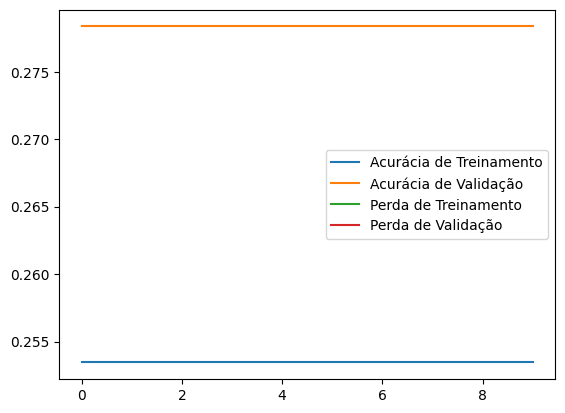

In [ ]:
# Plotar a precisão e a perda ao longo das épocas
plt.plot(history.history['accuracy'], label='Acurácia de Treinamento')
plt.plot(history.history['val_accuracy'], label='Acurácia de Validação')
plt.plot(history.history['loss'], label='Perda de Treinamento')
plt.plot(history.history['val_loss'], label='Perda de Validação')
plt.legend()
plt.show()

# Validação Cruzada



In [ ]:
kf = KFold(n_splits=5)
for train_index, test_index in kf.split(x_train):
    x_train_fold, x_val_fold = x_train[train_index], x_train[test_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[test_index]
    model.fit(x_train_fold, y_train_fold, epochs=50, validation_data=(x_val_fold, y_val_fold))

Epoch 1/50
29/29 [==============================] - 8s 293ms/step - loss: nan - accuracy: 0.2532 - val_loss: nan - val_accuracy: 0.2543
Epoch 2/50
29/29 [==============================] - 5s 189ms/step - loss: nan - accuracy: 0.2532 - val_loss: nan - val_accuracy: 0.2543
Epoch 3/50
29/29 [==============================] - 7s 252ms/step - loss: nan - accuracy: 0.2532 - val_loss: nan - val_accuracy: 0.2543
Epoch 4/50
29/29 [==============================] - 9s 308ms/step - loss: nan - accuracy: 0.2532 - val_loss: nan - val_accuracy: 0.2543
Epoch 5/50
29/29 [==============================] - 6s 197ms/step - loss: nan - accuracy: 0.2532 - val_loss: nan - val_accuracy: 0.2543
Epoch 6/50
29/29 [==============================] - 8s 280ms/step - loss: nan - accuracy: 0.2532 - val_loss: nan - val_accuracy: 0.2543
Epoch 7/50
29/29 [==============================] - 6s 194ms/step - loss: nan - accuracy: 0.2532 - val_loss: nan - val_accuracy: 0.2543
Epoch 8/50
29/29 [==============================

KeyboardInterrupt: 

# Detecção e Reconhecimento de Faces em uma Nova Imagem -  

Após treinar o modelo, agora podemos usá-lo para detectar e reconhecer faces em novas imagens que nãoram usadas na etapa de treinamento. Ou seja, wssa é a etapa de Teste da rede.

Este código permite que o usuário faça o upload de uma imagem, a converta para os formatos RGB e escala de cinza, e exiba os resultados lado a lado

Saving claudio2.jpg to claudio2.jpg


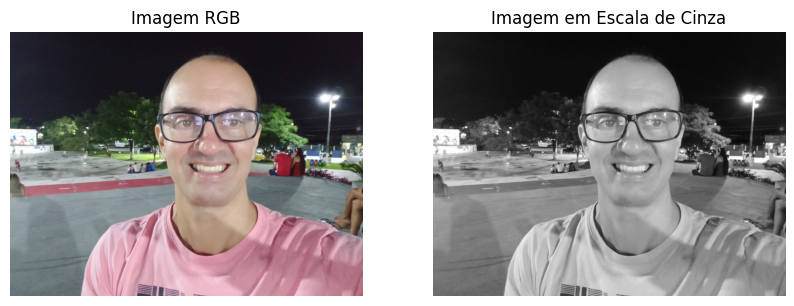

In [ ]:
# Fazer upload da imagem
uploaded = files.upload()

# Obter o nome do arquivo carregado
for filename in uploaded.keys():
    caminho_imagem = filename

# Carregar a imagem
imagem = cv2.imread(caminho_imagem)
if imagem is not None:
    # Converter para RGB
    imagem_rgb = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)
    # Converter para escala de cinza
    imagem_cinza = cv2.cvtColor(imagem, cv2.COLOR_BGR2GRAY)


    # Exibir a imagem
    plt.figure(figsize=(10,5))
    plt.subplot(1, 2, 1)
    plt.title('Imagem RGB')
    plt.imshow(imagem_rgb)
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.title('Imagem em Escala de Cinza')
    plt.imshow(imagem_cinza, cmap='gray')
    plt.axis('off')

    plt.show()
else:
    print("Erro ao carregar a imagem.")


# Detectar faces

Este fragmento de código realiza a detecção de faces em uma imagem em escala de cinza usando o classificador Haar Cascade do OpenCV e aplica a técnica de Non-Maximum Suppression (NMS) para filtrar as detecções redundantes. No final a quantidade de face detectadas.

In [ ]:
# Detectar faces
classificador = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
#faces = classificador.detectMultiScale(
#    imagem_cinza,
#    scaleFactor=1.1,  # Ajuste este valor conforme necessário
#    minNeighbors=5,   # Ajuste este valor conforme necessário
#    minSize=(300, 309), # Ajuste este valor conforme necessário
#    maxSize=(600, 600) # Ajuste este valor conforme necessário
#)
#faces = classificador.detectMultiScale(imagem_cinza, scaleFactor=1.1, minNeighbors=5)
# Equalização de histograma
imagem_cinza_eq = cv2.equalizeHist(imagem_cinza)
faces = classificador.detectMultiScale(imagem_cinza_eq, scaleFactor=1.1, minNeighbors=5, minSize=(50, 50), maxSize=(300, 300))

# Aplicar NMS
if len(faces) > 0:
    indices = cv2.dnn.NMSBoxes(faces.tolist(), [1.0] * len(faces), 0.5, 0.4)
    if len(indices) > 0:
      faces = faces[indices.flatten()]  # Converter para array unidimensional

print(f'Faces detectadas: {len(faces)}')

Faces detectadas: 2


# Mostrar qual foi a(s) label(s) encontrada(s)



In [ ]:
#Imprimir labels das faces após NMS
print("Labels das faces reconhecidas:")
for (x, y, w, h) in faces:
    face = imagem_rgb[y:y + h, x:x + w]
    face = cv2.resize(face, (64, 64))
    face = face.astype("float") / 255.0
    face = img_to_array(face)
    face = np.expand_dims(face, axis=0)
    prediction = model.predict(face)
    label = le.inverse_transform([np.argmax(prediction)])[0]
    print(label)

Labels das faces reconhecidas:


ValueError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2440, in predict_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2425, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2413, in run_step  **
        outputs = model.predict_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2381, in predict_step
        return self(x, training=False)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "model_2" is incompatible with the layer: expected shape=(None, 224, 224, 3), found shape=(None, 64, 64, 3)


# Reconhecimento Facial

Este fragmento de código realiza a classificação das faces detectadas, ou seja, ele tenta identificar a quem cada face pertence.

In [ ]:
# Reconhecer faces
for (x, y, w, h) in faces:
    face = imagem_rgb[y:y+h, x:x+w]
    face = cv2.resize(face, (64, 64))
    face = face.astype("float") / 255.0
    face = img_to_array(face)
    face = np.expand_dims(face, axis=0)
    prediction = model.predict(face)
    label = le.inverse_transform([np.argmax(prediction)])[0] # Corrigido para obter o label como string
    # Imprimir o label
    print("Label da foto:", label)
    # Desenhar retângulo e label na imagem
    font = cv2.FONT_HERSHEY_SIMPLEX
    font_scale = 5  # Ajuste este valor para aumentar o tamanho da fonte
    font_thickness = 5
    text_size = cv2.getTextSize(label, font, font_scale, font_thickness)[0]
    text_x = x + (w - text_size[0]) // 2
    text_y = y - 10
    cv2.rectangle(imagem_rgb, (x, y), (x+w, y+h), (255,0, 0), 4)
    #cv2.putText(imagem_rgb, label, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 3.0, (36,255,12), 2)
    cv2.putText(imagem_rgb, label, (text_x, text_y), font, font_scale, (255,0, 0), font_thickness)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
# Exibir a imagem com os retângulos e labels

## # Converter de volta para RGB para exibir com Matplotlib
plt.imshow(cv2.cvtColor(imagem_rgb, cv2.COLOR_BGR2RGB))
plt.title("Reconhecimento Facial")
plt.axis('off')
plt.show()